### Prepare the deconvolution mat - for cibersort

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e6, layer='counts')  # Normalize to CPM
#adata.layers['cpm'] = adata.X  # Save the normalized data in a layer

In [ ]:
# Create a DataFrame to hold the median expression values
genes = adata.var_names
cell_types = adata.obs['celltype_highres'].unique()
signature_matrix = pd.DataFrame(index=genes, columns=cell_types)

# Calculate median expression per cell type
for cell_type in cell_types:
    subset = adata[adata.obs['celltype_highres'] == cell_type]
    median_expression = np.median(subset.layers['counts'].A, axis=0)  # Adjust axis if necessary
    signature_matrix[cell_type] = median_expression

In [ ]:
signature_matrix

,Memory B Cells,TCRab CD8 Mobile TRM,Vascular Smooth Muscle Cells,TCRab CD4 Mobile TRM,MAdCAM1- Endothelial Cells,Neurons,Tuft Cells,TCRab CD4 FOXP3+ Treg,TCRab CD8 TRM,MAdCAM1+ Endothelial Cells,...,SPIB+ Cells,ILC3,Muscularis Smooth Muscle Cells,TCRab CD8ab TRM,Lymphatic Endothelial Cells,Naive B Cells,Goblet Cells,CD16- Conventional Monocytes,Enteroendocrine Cells,Intestinal Stem Cells
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AP006222.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LINC01409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM87B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC136616.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC136616.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC141272.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC007325.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


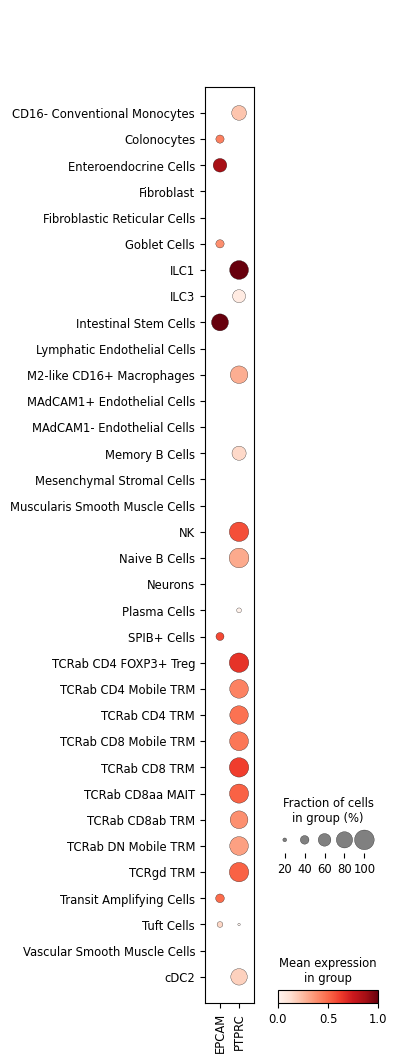

In [ ]:
plt.rcParams.update({'font.size': 5, 'font.weight': 'heavy','axes.linewidth':5})
plt.rcParams.update(plt.rcParamsDefault)


sc.pl.dotplot(adata,['EPCAM','PTPRC'],groupby = 'celltype_highres' , vmax = 1, 
              swap_axes = False ,dot_min = 0.1,standard_scale = 'var')
# Checked IL9, nothing

In [ ]:
adata.obs['celltype_highres'].values.categories

Index(['CD16- Conventional Monocytes', 'Colonocytes', 'Enteroendocrine Cells',
       'Fibroblast', 'Fibroblastic Reticular Cells', 'Goblet Cells', 'ILC1',
       'Innate Lymphoid Cells', 'Intestinal Epithelial Cells',
       'Intestinal Stem Cells', 'Lymphatic Endothelial Cells',
       'M2-like CD16+ Macrophages', 'MAdCAM1+ Endothelial Cells',
       'MAdCAM1- Endothelial Cells', 'Memory B Cells',
       'Mesenchymal Stromal Cells', 'Muscularis Smooth Muscle Cells', 'NK',
       'Naive B Cells', 'Neurons', 'Plasma Cells', 'SPIB+ Cells',
       'TCRab CD4 FOXP3+ Treg', 'TCRab CD4 Mobile TRM', 'TCRab CD4 TRM',
       'TCRab CD8 Mobile TRM', 'TCRab CD8 TRM', 'TCRab CD8aa MAIT',
       'TCRab CD8ab TRM', 'TCRab DN Mobile TRM', 'TCRgd TRM',
       'Transit Amplifying Cells', 'Tuft Cells',
       'Vascular Smooth Muscle Cells', 'cDC2'],
      dtype='object')

In [ ]:
Could_be_there = ['CD16- Conventional Monocytes', 'Colonocytes', 'Enteroendocrine Cells',
     'Goblet Cells', 'ILC1',
       'ILC3', 
       'Intestinal Stem Cells', 
       'M2-like CD16+ Macrophages', 'Memory B Cells',
       'NK',
       'Naive B Cells', 'SPIB+ Cells',
       'TCRab CD4 FOXP3+ Treg', 'TCRab CD4 Mobile TRM', 'TCRab CD4 TRM',
       'TCRab CD8 Mobile TRM', 'TCRab CD8 TRM', 'TCRab CD8aa MAIT',
       'TCRab CD8ab TRM', 'TCRab DN Mobile TRM', 'TCRgd TRM',
       'Transit Amplifying Cells', 'Tuft Cells',
      'cDC2']

In [ ]:
Could_be_there_signatures = signature_matrix[Could_be_there]

In [ ]:
Could_be_there_signatures.to_csv('Could_be_in_gut_signatures.csv')

#### donor specific

In [ ]:
# Create a DataFrame to hold the median expression values
genes = adata.var_names
cell_types = adata.obs['celltype_highres'].unique()
signature_matrix = pd.DataFrame(index=genes, columns=cell_types)

# Calculate median expression per cell type
for cell_type in cell_types:
    subset = adata[adata.obs['celltype_highres'] == cell_type]
    d3_subset = subset[subset.obs['batch'] == '3']
    median_expression = np.median(d3_subset.layers['counts'].A, axis=0)  # Adjust axis if necessary
    signature_matrix[cell_type] = median_expression

In [ ]:
signature_matrix

,Memory B Cells,TCRab CD8 Mobile TRM,Vascular Smooth Muscle Cells,TCRab CD4 Mobile TRM,MAdCAM1- Endothelial Cells,Neurons,Tuft Cells,TCRab CD4 FOXP3+ Treg,TCRab CD8 TRM,MAdCAM1+ Endothelial Cells,...,SPIB+ Cells,ILC3,Muscularis Smooth Muscle Cells,TCRab CD8ab TRM,Lymphatic Endothelial Cells,Naive B Cells,Goblet Cells,CD16- Conventional Monocytes,Enteroendocrine Cells,Intestinal Stem Cells
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
AL627309.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
AP006222.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
LINC01409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
FAM87B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC136616.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
AC136616.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
AC141272.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
AC007325.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
Could_be_there_signatures = signature_matrix[Could_be_there]

In [ ]:
Could_be_there_signatures.to_csv('Could_be_in_gut_signatures_d3.csv')

In [ ]:
# Create a DataFrame to hold the median expression values
genes = adata.var_names
cell_types = adata.obs['celltype_highres'].unique()
signature_matrix = pd.DataFrame(index=genes, columns=cell_types)

# Calculate median expression per cell type
for cell_type in cell_types:
    subset = adata[adata.obs['celltype_highres'] == cell_type]
    d3_subset = subset[subset.obs['batch'] == '4']
    median_expression = np.median(d3_subset.layers['counts'].A, axis=0)  # Adjust axis if necessary
    signature_matrix[cell_type] = median_expression

In [ ]:
signature_matrix

,Memory B Cells,TCRab CD8 Mobile TRM,Vascular Smooth Muscle Cells,TCRab CD4 Mobile TRM,MAdCAM1- Endothelial Cells,Neurons,Tuft Cells,TCRab CD4 FOXP3+ Treg,TCRab CD8 TRM,MAdCAM1+ Endothelial Cells,...,SPIB+ Cells,ILC3,Muscularis Smooth Muscle Cells,TCRab CD8ab TRM,Lymphatic Endothelial Cells,Naive B Cells,Goblet Cells,CD16- Conventional Monocytes,Enteroendocrine Cells,Intestinal Stem Cells
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL627309.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AP006222.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LINC01409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM87B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC136616.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC136616.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC141272.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC007325.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Could_be_there_signatures = signature_matrix[Could_be_there]

In [ ]:
Could_be_there_signatures.to_csv('Could_be_in_gut_signatures_d4.csv')